# Por que não estão ortogonais? :(

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import HTML
from matplotlib import animation
from sympy import *

In [2]:
def scale(fromlim, tolim):
    
    A, B = fromlim
    C, D = tolim
    
    return lambda x: C*(1 - (x - A)/(B - A)) + D*((x - A) / (B - A))

In [3]:
def ortho_curve(f, xlim, ylim, frames=20, interval=700, line_len=.1):
    
    fx_ = sympify(f)
    fx0_ = fx_.subs({'x': 'x0'})
    fx = lambdify(('x'), fx_, 'numpy')
    print('f(x) = {}'.format(fx_))
    
    fd_ = diff(fx_).subs('x', 'x0')
    fd = lambdify(('x0'), fd_, 'numpy')
    print('f\'(x0) = {}'.format(fd_))
    
    ftan_ = sympify('fx + fd * (x - x0)').subs({'fx':fx0_, 'fd': fd_})
    ftan = lambdify(('x', 'x0'), ftan_, 'numpy')
    print('ftan(x, x0) = {}'.format(ftan_))
    
    forth_ = sympify('fx - (1.0/fd) * (x - x0)').subs({'fx': fx0_, 'fd': fd_})
    forth = lambdify(('x', 'x0'), forth_, 'numpy')
    print('forth(x, x0) = {}'.format(forth_))
    
    x = np.linspace(xlim[0], xlim[1], 100)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_ylim(ylim)
    
    _, = ax.plot(x, fx(x))
    _, = ax.plot(x, np.zeros_like(x))
    line, = ax.plot([], [])
    line2, = ax.plot([], [])
    
    scale_ = scale((0, frames - 1), xlim)
    
    def init():
        
        return (line,)
    
    def animate(i):
        
        x0 = scale_(i)
        x_ = np.linspace(x0 - line_len, x0 + line_len, 10)
        y = ftan(x_, x0)
        line.set_data(x_, y)
        yo = forth(x_, x0)
        line2.set_data(x_, yo)

        return (line, line2, )
    
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval = interval)
    
    return anim

# $$x^2$$

f(x) = x**2
f'(x0) = 2*x0
ftan(x, x0) = x0**2 + 2*x0*(x - x0)
forth(x, x0) = x0**2 - 0.5*(x - x0)/x0


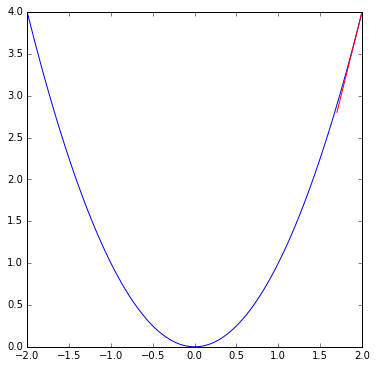

In [4]:
anim = ortho_curve('x^2', xlim=(-2, 2), ylim=(0, 4), line_len=.3)
HTML(anim.to_html5_video())

# $$x^3$$

f(x) = x**3
f'(x0) = 3*x0**2
ftan(x, x0) = x0**3 + 3*x0**2*(x - x0)
forth(x, x0) = x0**3 - 0.333333333333333*(x - x0)/x0**2


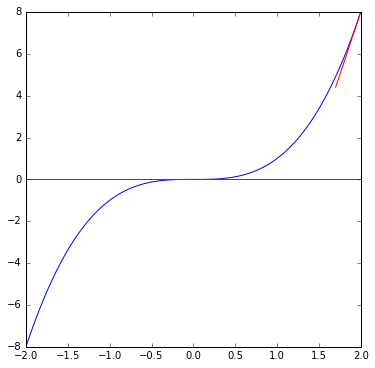

In [5]:
anim = ortho_curve('x^3', xlim=(-2, 2), ylim=(-8, 8), line_len=.3)
HTML(anim.to_html5_video())

# $$sin(x)$$

f(x) = sin(x)
f'(x0) = cos(x0)
ftan(x, x0) = (x - x0)*cos(x0) + sin(x0)
forth(x, x0) = -1.0*(x - x0)/cos(x0) + sin(x0)


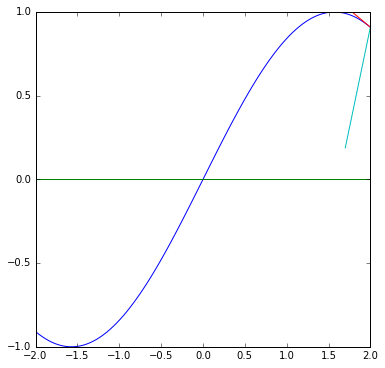

In [6]:
anim = ortho_curve('sin(x)', xlim=(-2, 2), ylim=(-1, 1), line_len=.3)
HTML(anim.to_html5_video())